In [ ]:
# @title
import requests
import pandas as pd

In [ ]:
# @title
# 1. Obtener datos climáticos de ciudades principales (SIN API KEY)
ciudades_coords = {
    'Bogotá': {'lat': 4.7110, 'lon': -74.0721},
    'Ciudad de México': {'lat': 19.4326, 'lon': -99.1332},
    'Buenos Aires': {'lat': -34.6118, 'lon': -58.3960},
    'Santiago': {'lat': -33.4489, 'lon': -70.6693}
}

In [ ]:
#Vamos a guardar los datos en una variable
datos_clima = []

In [ ]:
#Vamos a extraer los datos de la API y organizarlos
for ciudad, coords in ciudades_coords.items():
    # Open-Meteo API - Es gratuita
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        'latitude': coords['lat'],
        'longitude': coords['lon'],
        'current': 'temperature_2m,relative_humidity_2m,precipitation',
        'daily': 'temperature_2m_max,temperature_2m_min,precipitation_sum',
        'timezone': 'auto',
        'forecast_days': 7
    }
    # Código para obtener datos climáticos de ciudades principales
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json() #RECUERDA LAS APIs Responden en formato json > Casi siempre :S

        # Extraer datos actuales
        current = data['current']
        daily = data['daily']

        # Calcular promedios semanales
        temp_promedio = sum(daily['temperature_2m_max'][:7]) / 7
        precipitacion_total = sum(daily['precipitation_sum'][:7])

        # Agregar datos al nuevo conjunto que estamos creando (datos_clima)
        datos_clima.append({
            'ciudad': ciudad,
            'temperatura_actual': current['temperature_2m'],
            'humedad_actual': current['relative_humidity_2m'],
            'temp_promedio_semanal': round(temp_promedio, 1),
            'precipitacion_semanal': round(precipitacion_total, 1),
            'demanda_helados_estimada': round(temp_promedio * 12, 0)  # Por causaliad podemos decir que mayor temp = >demanda
        })

In [ ]:
# @title
#veamos qué hicimos
datos_clima

In [ ]:
# 2. Crear DataFrame
df_clima = pd.DataFrame(datos_clima) # Observa cuando llamamos la libraría Pandas, decimos as pd

In [ ]:
# Veamos cómo logramos transformar
df_clima

,ciudad,temperatura_actual,humedad_actual,temp_promedio_semanal,precipitacion_semanal,demanda_helados_estimada
0,Bogotá,18.0,56,18.2,19.2,218.0
1,Ciudad de México,19.5,60,24.3,55.3,291.0
2,Buenos Aires,18.6,41,15.4,0.3,185.0
3,Santiago,21.7,43,18.9,12.3,227.0


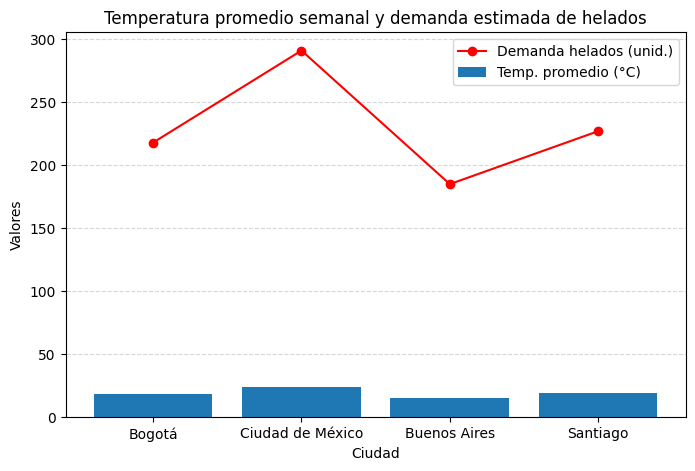

In [ ]:
import matplotlib.pyplot as plt

# Configuración de estilo
plt.figure(figsize=(8, 5))

# Barras para temperatura promedio semanal
plt.bar(df_clima['ciudad'], df_clima['temp_promedio_semanal'], label='Temp. promedio (°C)')

# Línea para demanda estimada
plt.plot(df_clima['ciudad'], df_clima['demanda_helados_estimada'], marker='o', color='red', label='Demanda helados (unid.)')


#La estética ante todo

# Títulos y etiquetas
plt.title('Temperatura promedio semanal y demanda estimada de helados')
plt.xlabel('Ciudad')
plt.ylabel('Valores')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
# 3. Análisis empresarial
print("🍦 RANKING DE DEMANDA DE HELADOS POR CIUDAD:")
print(df_clima.sort_values('demanda_helados_estimada', ascending=False)
      [['ciudad', 'temp_promedio_semanal', 'demanda_helados_estimada']])

In [ ]:
# 4. Insights adicionales
print("\n🌡️ CONDICIONES CLIMÁTICAS ACTUALES:")
print(df_clima[['ciudad', 'temperatura_actual', 'humedad_actual', 'precipitacion_semanal']])